## This script contains:
#### 1. Import libraries and data
#### 2. The elbow technique
#### 3. K-means clustering
    - Score and GDP
    - Score and Health
    - Score and Support
    - Score and Freedom
    - Score and Generosity
    - Score and Corruption
#### 4. Results

# 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create path to folder

path = r'C:\Users\ejgor\OneDrive\Data Analytics\Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\World Happiness Report Analysis'

In [4]:
# import cleaned dataframe

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2015-2019.csv'), index_col = False)

In [5]:
df.shape

(782, 10)

In [6]:
df.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [7]:
df.tail()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
777,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
778,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
779,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
780,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019
781,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019


# 2. The elbow technique

In [8]:
# drop columns 'Country' (categorical), 'Rank' (not needed for analysis), and 'Year' (not needed for analysis)

df.drop(['Country', 'Rank', 'Year'], axis = 1, inplace = True)

In [9]:
df.shape

(782, 7)

In [10]:
df.head()

,Score,Support,GDP,Health,Freedom,Generosity,Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-1297.3322251231948,
 -492.54109990251,
 -310.51661349998193,
 -241.25009985969183,
 -198.33330706532374,
 -180.9103076930271,
 -166.7753220913264,
 -155.78587361796664,
 -148.25374738169364]

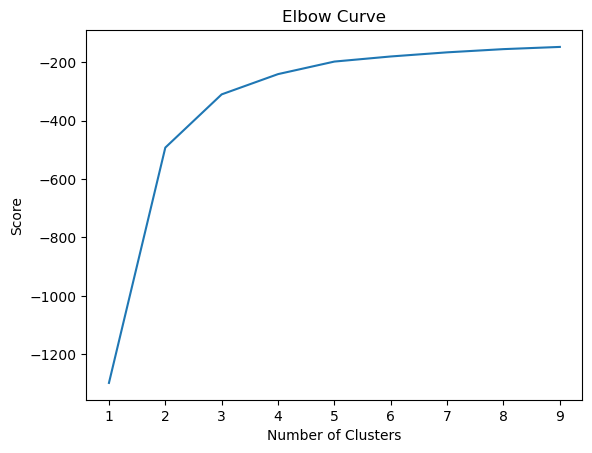

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a jump from 2 to 3 on the x-axis then the line straightens out, so the optimal number of cluster is 3.

# 3. K-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# create new column 'clusters'

df['clusters'] = kmeans.fit_predict(df)

C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ejgor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [17]:
df.head()

,Score,Support,GDP,Health,Freedom,Generosity,Corruption,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [18]:
df['clusters'].value_counts()

0    308
2    278
1    196
Name: clusters, dtype: int64

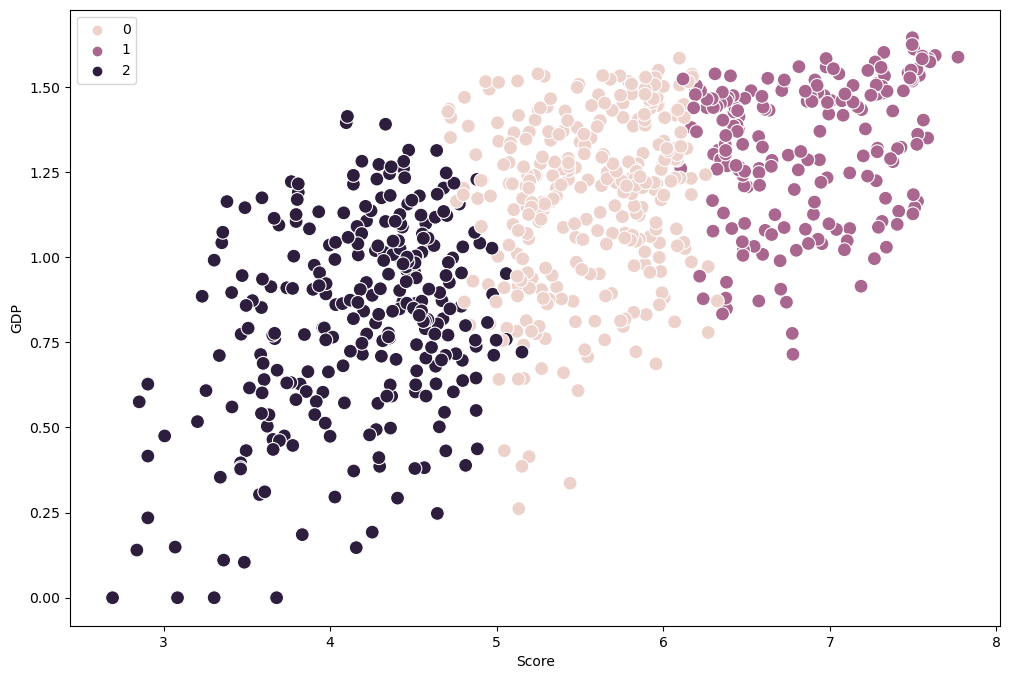

In [19]:
# Plot the clusters for the 'Score' and 'GDP' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['GDP'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('GDP') # Label y-axis.
plt.show()

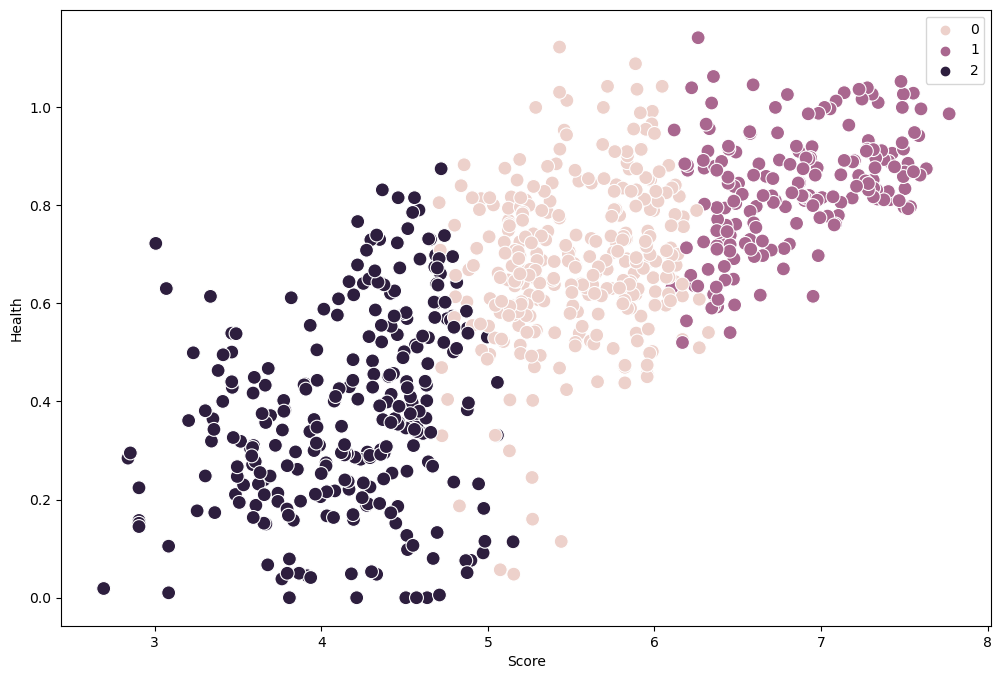

In [20]:
# Plot the clusters for the 'Score' and 'Health' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['Health'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.show()

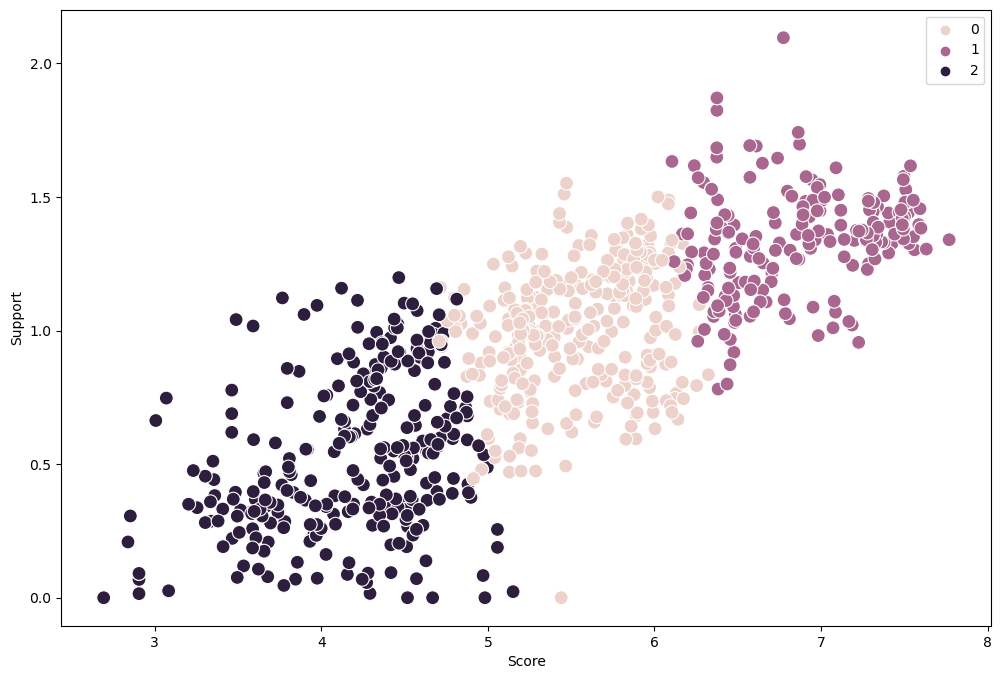

In [21]:
# Plot the clusters for the 'Score' and 'Support' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['Support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Support') # Label y-axis.
plt.show()

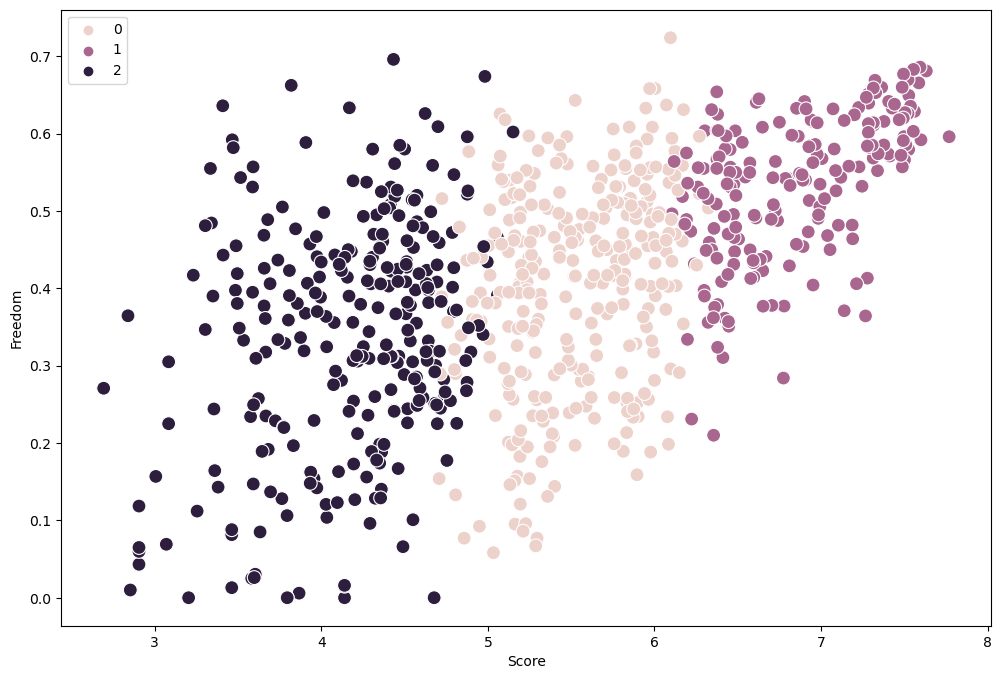

In [22]:
# Plot the clusters for the 'Score' and 'Freedom' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['Freedom'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Freedom') # Label y-axis.
plt.show()

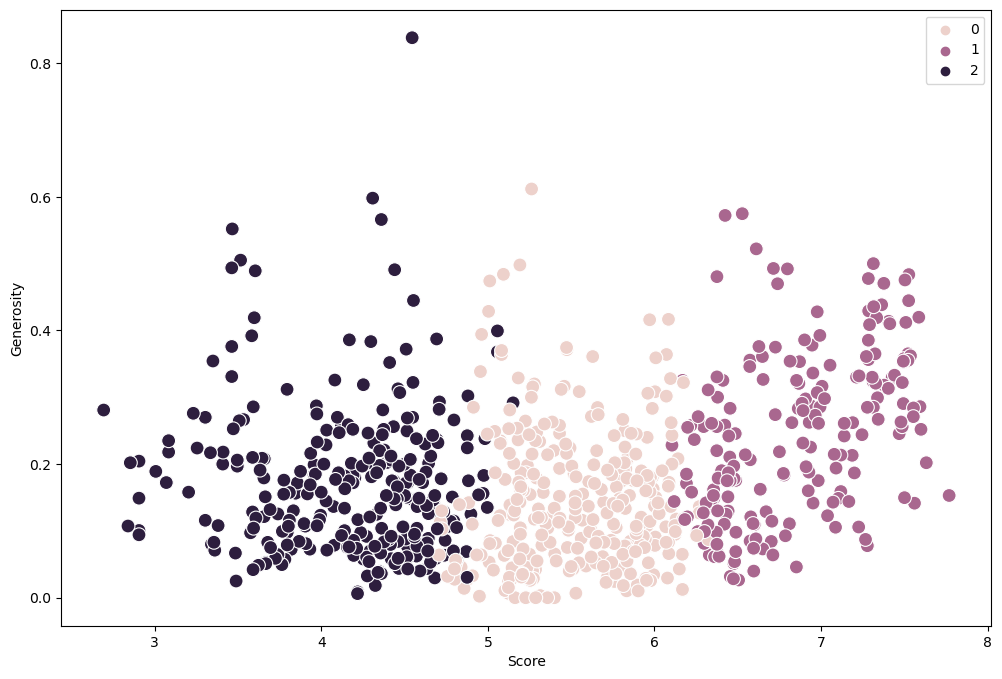

In [23]:
# Plot the clusters for the 'Score' and 'Generosity' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['Generosity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

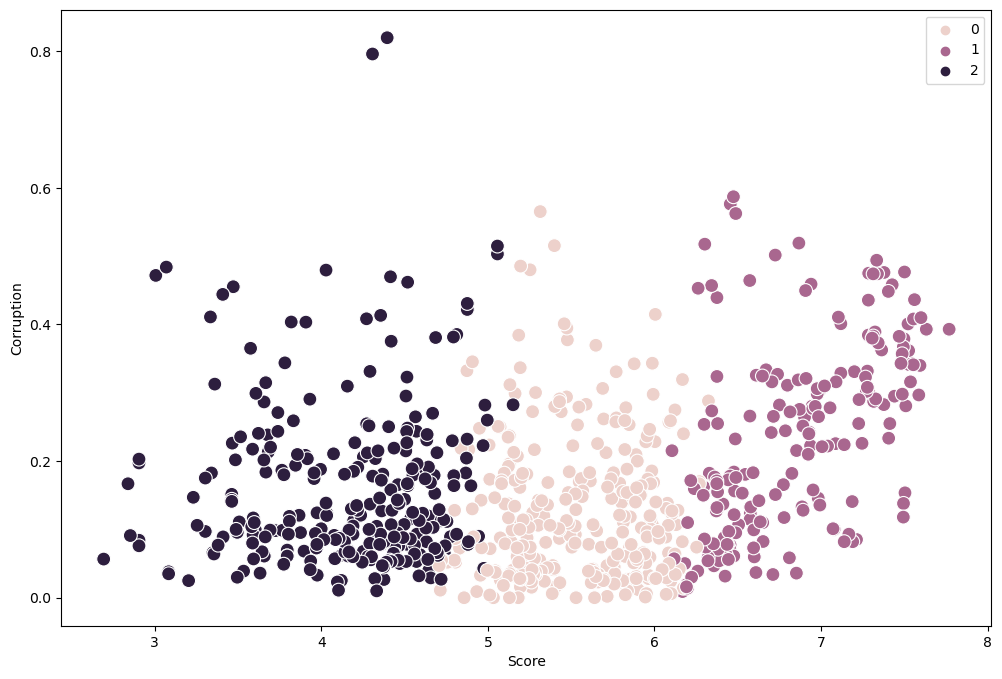

In [24]:
# Plot the clusters for the 'Score' and 'Corruption' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Score'], y=df['Corruption'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Corruption') # Label y-axis.
plt.show()

In [25]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df.groupby('cluster').agg({'Score':['mean', 'median'], 
                         'GDP':['mean', 'median'], 
                         'Health':['mean', 'median'],
                          'Support':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Generosity':['mean', 'median'],
                          'Corruption':['mean', 'median']})

Score               GDP              Health             Support  \
             mean  median      mean    median      mean    median      mean   
cluster                                                                       
black    4.168288  4.2860  0.812401  0.847915  0.376685  0.359870  0.518708   
pink     5.536334  5.5250  1.164116  1.208447  0.684433  0.684500  1.008559   
purple   6.849066  6.8385  1.320958  1.368500  0.833598  0.838177  1.334246   

                    Freedom           Generosity           Corruption  \
           median      mean    median       mean    median       mean   
cluster                                                                 
black    0.471775  0.336245  0.353500   0.171493  0.153000   0.158152   
pink     1.024820  0.401686  0.418136   0.142628  0.121681   0.126692   
purple   1.343140  0.532029  0.550068   0.244913  0.248790   0.237051   

                   
           median  
cluster            
black    0.119152  
pink     0.100370  
purple   0.236755

# 4. Results

#### GDP, Health, and Support are the variables which seem to impact Happiness Score the most, which provides further backs the hypothesis that if a country has high GDP, Health, and Support, then they have a higher Happiness Score. Looking at the mean and median for Freedom, Generosity, and Corruption, we see that these variables don't have as much of an impact on Happiness Score. The clusters also show more definitively that the variables don't necessarily follow a linear trend. For example, a country can have a GDP of 1 but be in any of the three clusters. This tells me that happiness is a combination of location, economy, and lifestyle. Also, happiness is subjective.

#### For future analysis, these results will be useful by being able to visualize why a country has a high, middle, or low happiness score based on GDP, Health, and Support. For example, a country may be high in GDP but is low in Health and Support giving that country a low happiness score.

In [27]:
df.to_csv('cluster.csv')